# Loading And Graphing Monthly Summaries

In [19]:
# Make the json_helper module available to this notebook.
import json_helper

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

In [20]:
# Using the json_helper module, load all of the json files acquired in part one of this lab into a Pandas DataFrame.
def read_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)["results"]
    return data

def read_all_json_files(JSON_ROOT):
    all_records = []
    for item_name in os.listdir(JSON_ROOT):
        item_path = os.path.join(JSON_ROOT, item_name)
        if os.path.isfile(item_path) and item_name.endswith(".json"):
            with open(item_path, 'r', encoding='utf-8') as f:
                subdata = read_json(item_path)
                for obj in subdata:
                    obj["source_file"] = item_name  # Track the source file
                    all_records.append(obj)

    return pd.DataFrame(all_records)

df = read_all_json_files('./data/monthly_summaries')

In [21]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3237 non-null   object 
 1   datatype     3237 non-null   object 
 2   station      3237 non-null   object 
 3   attributes   3237 non-null   object 
 4   value        3237 non-null   float64
 5   source_file  3237 non-null   object 
dtypes: float64(1), object(5)
memory usage: 151.9+ KB


In [22]:
df

,date,datatype,station,attributes,value,source_file
0,1958-01-01T00:00:00,TAVG,GHCND:USC00075852,",0",0.26,FIPS:10003_avg_1958_to_1968.json
1,1958-01-01T00:00:00,TAVG,GHCND:USC00076410,",0",-0.57,FIPS:10003_avg_1958_to_1968.json
2,1958-01-01T00:00:00,TAVG,GHCND:USC00079605,",0",-0.58,FIPS:10003_avg_1958_to_1968.json
3,1958-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.71,FIPS:10003_avg_1958_to_1968.json
4,1958-02-01T00:00:00,TAVG,GHCND:USC00075852,",0",-1.69,FIPS:10003_avg_1958_to_1968.json
...,...,...,...,...,...,...
3232,1997-11-01T00:00:00,TAVG,GHCND:USC00079605,",0",6.77,FIPS:10003_avg_1988_to_1998.json
3233,1997-11-01T00:00:00,TAVG,GHCND:USW00013781,",0",6.44,FIPS:10003_avg_1988_to_1998.json
3234,1997-12-01T00:00:00,TAVG,GHCND:USC00076410,"1,0",3.57,FIPS:10003_avg_1988_to_1998.json
3235,1997-12-01T00:00:00,TAVG,GHCND:USC00079605,",0",3.39,FIPS:10003_avg_1988_to_1998.json


In [23]:
# How many stations are there?
# How many rows are associated with each DataFrame?
print(df["station"].nunique())

8


# Narrow our analysis to station id: GHCND:USW00013781

https://www.ncdc.noaa.gov/cdo-web/api/v2/stations/GHCND:USC00071200

```json
{
    "elevation": 24.1,
    "mindate": "1948-01-01",
    "maxdate": "2019-12-05",
    "latitude": 39.6744,
    "name": "WILMINGTON NEW CASTLE CO AIRPORT, DE US",
    "datacoverage": 1,
    "id": "GHCND:USW00013781",
    "elevationUnit": "METERS",
    "longitude": -75.60567
}
```

In [24]:
# Create a DataFrame called "df_wilm_readings". 
# This DataFrame should only contain records associated with station id 'GHCND:USW00013781'.
df_wilm_readings=df[df["station"]=="GHCND:USW00013781"]

In [25]:
df_wilm_readings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 3 to 3236
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         848 non-null    object 
 1   datatype     848 non-null    object 
 2   station      848 non-null    object 
 3   attributes   848 non-null    object 
 4   value        848 non-null    float64
 5   source_file  848 non-null    object 
dtypes: float64(1), object(5)
memory usage: 46.4+ KB


In [26]:
# Display a summary of the df_wilm_readings DataFrame.
df_wilm_readings

,date,datatype,station,attributes,value,source_file
3,1958-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.71,FIPS:10003_avg_1958_to_1968.json
7,1958-02-01T00:00:00,TAVG,GHCND:USW00013781,",0",-2.64,FIPS:10003_avg_1958_to_1968.json
11,1958-03-01T00:00:00,TAVG,GHCND:USW00013781,",0",3.84,FIPS:10003_avg_1958_to_1968.json
15,1958-04-01T00:00:00,TAVG,GHCND:USW00013781,",0",11.88,FIPS:10003_avg_1958_to_1968.json
19,1958-05-01T00:00:00,TAVG,GHCND:USW00013781,",0",15.95,FIPS:10003_avg_1958_to_1968.json
...,...,...,...,...,...,...
3224,1997-08-01T00:00:00,TAVG,GHCND:USW00013781,",0",22.63,FIPS:10003_avg_1988_to_1998.json
3227,1997-09-01T00:00:00,TAVG,GHCND:USW00013781,",0",18.58,FIPS:10003_avg_1988_to_1998.json
3230,1997-10-01T00:00:00,TAVG,GHCND:USW00013781,",0",13.13,FIPS:10003_avg_1988_to_1998.json
3233,1997-11-01T00:00:00,TAVG,GHCND:USW00013781,",0",6.44,FIPS:10003_avg_1988_to_1998.json


In [27]:
# Create a DataFrame called jan_readings.
# This DataFrame should filter the contents of df_wilm_readings in such a way that it only keeps records 
# which are associated with the month of January.
# Make sure that rows are sorted by date.
jan_readings=df_wilm_readings[pd.to_datetime(df_wilm_readings['date']).dt.month == 1]
jan_readings

,date,datatype,station,attributes,value,source_file
3,1958-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.71,FIPS:10003_avg_1958_to_1968.json
50,1959-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.61,FIPS:10003_avg_1958_to_1968.json
96,1960-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",1.70,FIPS:10003_avg_1958_to_1968.json
144,1961-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-3.56,FIPS:10003_avg_1958_to_1968.json
189,1962-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-0.47,FIPS:10003_avg_1958_to_1968.json
...,...,...,...,...,...,...
3060,1993-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",3.08,FIPS:10003_avg_1988_to_1998.json
3096,1994-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-3.19,FIPS:10003_avg_1988_to_1998.json
3132,1995-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",2.55,FIPS:10003_avg_1988_to_1998.json
3168,1996-01-01T00:00:00,TAVG,GHCND:USW00013781,",0",-1.17,FIPS:10003_avg_1988_to_1998.json


In [28]:
# What is the shape of jan_readings?
jan_readings.shape

(70, 6)

* Create a line graph which meets the following requirements:
* The x axis should represent the year.
* The y axis should represent the temperature in celsius.
* Each point should display the average temperature in celsius for a given year.
* At a minimum it should display data from 1938 to 2017. 
* Make sure to include the x and y labels. 
* Make sure that x and y ticks are readable. 

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Average Temperatures from 1938-2017')]

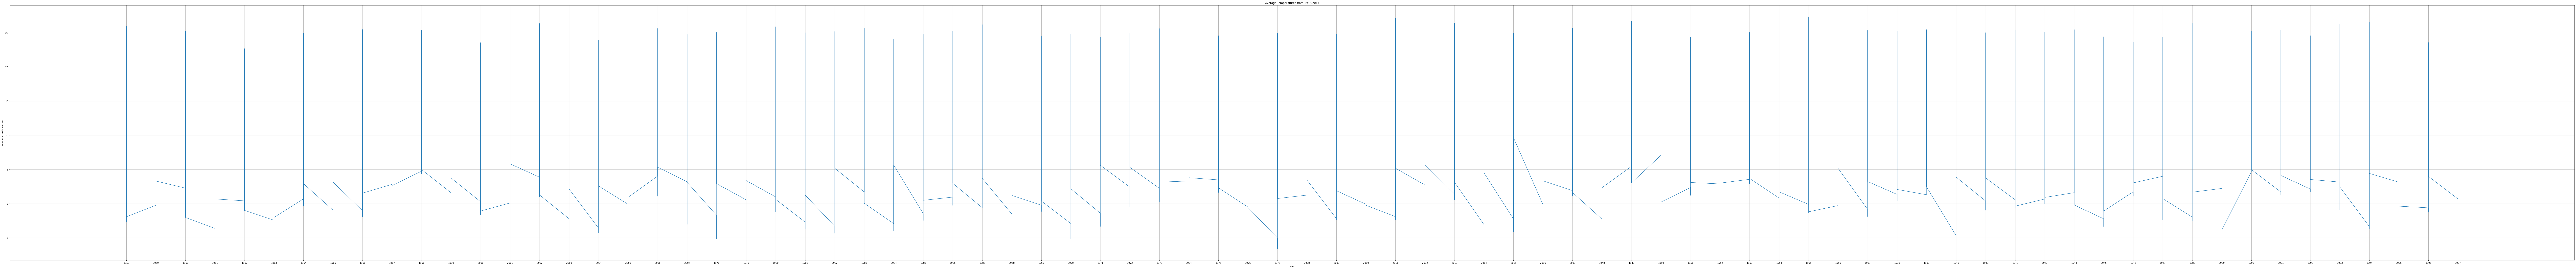

In [36]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

x = df['date'].str[0:4]
y = df['value']
fig, ax = plt.subplots()
fig.set_size_inches(200, 20)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='Year', ylabel='temperature in celsius', title='Average Temperatures from 1938-2017')